In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zs_results = []
sel_metric = "test_AUPRC"

# experiment_folders = [
#     "outputs/ResAMR_DrugZeroShot/ZS_noCNN_emb512_DRIAMS-A_drugs_zero_shot_sp0_results",
#     "outputs/DRIAMS_B/MLP_zero_shot/lowLR_long_BN_zs/metrics",
#     "outputs/DRIAMS_C/MLP_zero_shot_driamsC/lowLR_long_BN_zs/metrics",
#     "outputs/DRIAMS_D/MLP_zero_shot_driamsD/lowLR_long_BN_zs//metrics",
# ]

folder_template = "outputs/ResAMR_DrugZeroShot/ZS_noCNN_emb512_DRIAMS-{}_drugs_zero_shot_sp0_results"
for j, dataset in enumerate(["A", "B", "C", "D"]):
    long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
    long_table = long_table[long_table["dataset"]==dataset]

    drugs_list = sorted(long_table["drug"].unique())
    len(drugs_list)

    zs_metrics = []
    for i, drug_name in enumerate(drugs_list):
        avg_response = long_table[long_table["drug"]==drug_name]["response"].mean()
        if avg_response==0.0 or avg_response==1.0:
            continue
        print(drug_name, long_table[long_table["drug"]==drug_name]["response"].mean())
        try:
            with open(os.path.join(folder_template.format(dataset), "test_metrics_{}.json".format(i)), "r") as f:
                m = json.load(f)
                # print(m)
                m["drug"] = drug_name
                m["dataset"] = dataset
        except:
            print(os.path.join(folder_template.format(dataset), "test_metrics_{}.json".format(i)))
            continue
        zs_metrics.append(m)
    zs_df = pd.DataFrame(zs_metrics)
    zs_df.set_index("drug")

    drugs_to_remove = []
    for dr in drugs_list:
        df = long_table[long_table["drug"]==dr]
        if len(df["response"].value_counts())<2:
            drugs_to_remove.append(dr)

    zs_df = zs_df[~zs_df["drug"].isin(drugs_to_remove)].dropna().sort_values(by=sel_metric, ascending=False)
    zs_results.append(zs_df)
    # break
zs_results[0]




5-Fluorocytosine 0.03676470588235294
Amikacin 0.056600487634970394
Aminoglycosides 0.16393442622950818
Amoxicillin 0.21621621621621623
Anidulafungin 0.28296296296296297
Azithromycin 0.12631578947368421
Aztreonam 0.705607476635514
Caspofungin 0.05393586005830904
Cefazolin 0.420785173375847
Cefepime 0.2289165086721438
Cefixime 0.08108108108108109
Cefpodoxime 0.34791666666666665
Ceftarolin 0.2702702702702703
Ceftazidime 0.1411243964129685
Ceftobiprole 0.6129032258064516
Ceftriaxone 0.27496703710679976
Cefuroxime 0.4230478351295141
Chloramphenicol 0.13793103448275862
Ciprofloxacin 0.24437825275768388
Clarithromycin 0.18849840255591055
Clindamycin 0.3132104719255942
Colistin 0.15538956436399323
Cotrimoxazole 0.18288288288288287
Daptomycin 0.008784258608573436
Doxycycline 0.11428571428571428
Ertapenem 0.019521453263742966
Erythromycin 0.4087914071667118
Fluconazole 0.3925925925925926
Fosfomycin 0.5802469135802469
Fusidic acid 0.32086114505969726
Gentamicin 0.2176954343510729
Imipenem 0.23378

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug,dataset
29,0.502879,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,Fusidic acid,A
13,0.758145,0.457387,0.660196,0.480328,0.971051,0.994672,0.321547,Ceftazidime,A
35,0.261043,0.692170,0.879770,0.732462,0.857094,0.671019,0.838659,Linezolid,A
7,0.262309,0.759925,0.884505,0.810893,0.834502,0.806041,0.825564,Caspofungin,A
42,3.396021,0.232781,0.616919,0.473551,0.827547,0.910432,0.323171,Nitrofurantoin,A
5,1.483513,0.191475,0.590878,0.499390,0.825050,0.852208,0.355839,Azithromycin,A
12,0.519171,0.696821,0.877552,0.778076,0.809149,0.681264,0.917783,Ceftarolin,A
15,0.442088,0.669330,0.834332,0.745173,0.801378,0.754937,0.748159,Ceftriaxone,A
40,0.241316,0.627582,0.758329,0.643612,0.788756,0.847366,0.532057,Moxifloxacin,A
9,0.913310,0.526743,0.708013,0.582825,0.753685,0.914464,0.438308,Cefepime,A


In [3]:
sorted(long_table[long_table["dataset"]=="A"]["drug"].unique())

[]

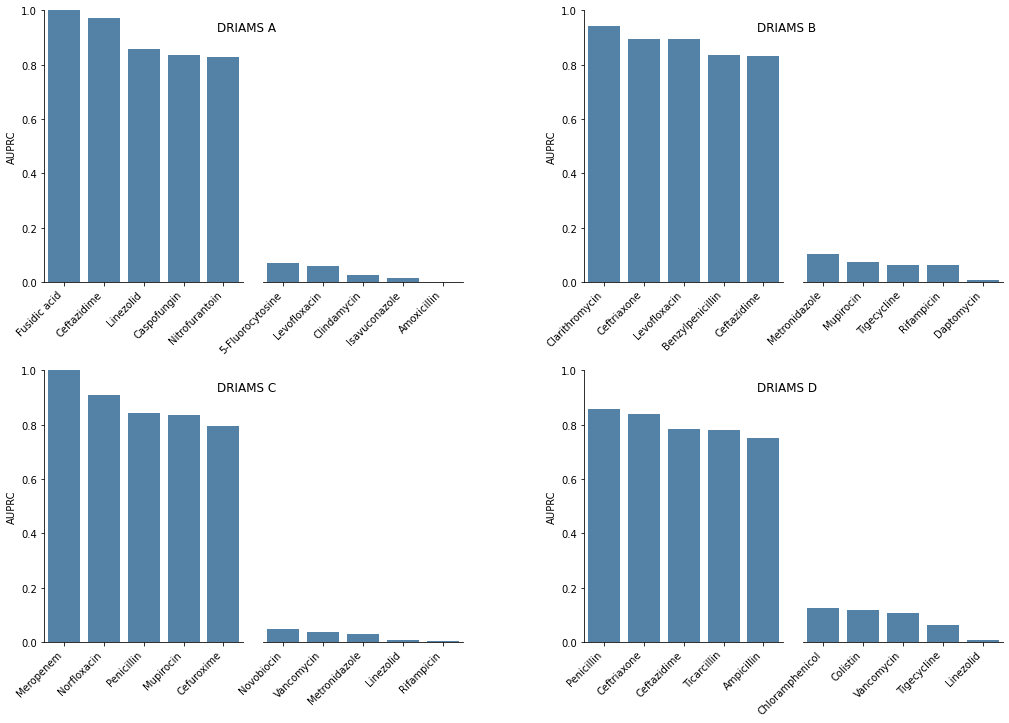

In [4]:
sel_metric = "test_AUPRC"

fig = plt.figure(figsize=(15, 10))
# fig.suptitle('Figure title')

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=2)
datasets = ["A", "B", "C", "D"]
for row, subfig in enumerate(subfigs.flatten()):
    dset = datasets[row]
    subfig.suptitle(f'DRIAMS {dset}', y=0.85)
    
    
    df = zs_results[row].dropna().sort_values(by=sel_metric, ascending=False)

    axs = subfig.subplots(nrows=1, ncols=2)
    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df.iloc[:5], y=sel_metric, x="drug", ax=axs[0], color="steelblue")
    sns.barplot(data=df.iloc[-5:], y=sel_metric, x="drug", ax=axs[1], color="steelblue")
    axs[0].set_ylabel("AUPRC")
    axs[0].set_xlabel("")
    axs[1].set_xlabel("")
    axs[0].set_ylim(0,1)
    axs[1].set_ylim(0,1)
    # sns.despine()
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[0].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    for label in axs[1].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    plt.subplots_adjust(hspace=0.9, wspace=0.1)


    # create 1x3 subplots per subfig
    # for col, ax in enumerate(axs):
        # ax.plot()
        # ax.set_title(f'Plot title {col}')
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

fig.savefig("outputs/plots/drugs_zero_shot.pdf", bbox_inches="tight")
plt.show()


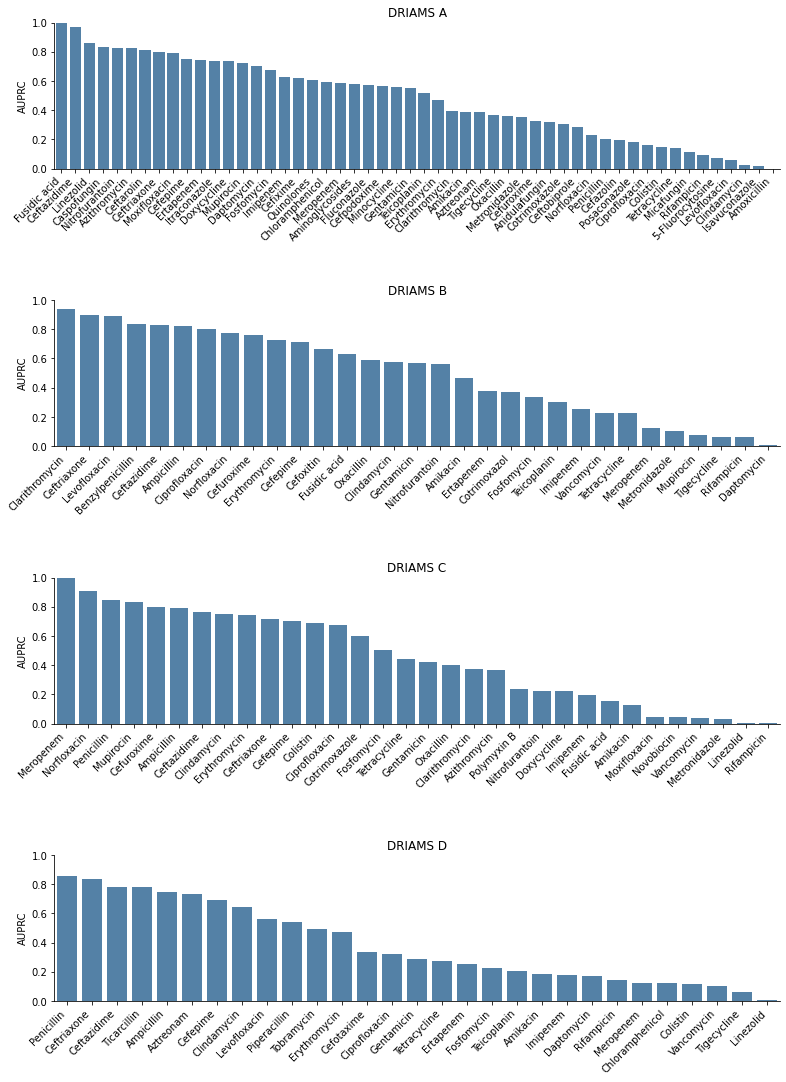

In [5]:
sel_metric = "test_AUPRC"


fig, axs = plt.subplots(4, 1, figsize=(13, 18))
for j, dataset in enumerate(["A", "B", "C", "D"]):

    df = zs_results[j].dropna().sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=axs[j], color="steelblue")
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[j].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
plt.show()

In [30]:
joined_df = pd.concat(zs_results)
joined_df = joined_df[["dataset", "drug", "test_AUPRC"]]
# joined_df.to_csv("outputs/zero_shot_results.csv", index=False)
joined_df               

,dataset,drug,test_AUPRC
29,A,Fusidic acid,1.000000
13,A,Ceftazidime,0.971051
35,A,Linezolid,0.857094
7,A,Caspofungin,0.834502
42,A,Nitrofurantoin,0.827547
...,...,...,...
7,D,Chloramphenicol,0.125000
10,D,Colistin,0.116375
28,D,Vancomycin,0.106325
26,D,Tigecycline,0.062500


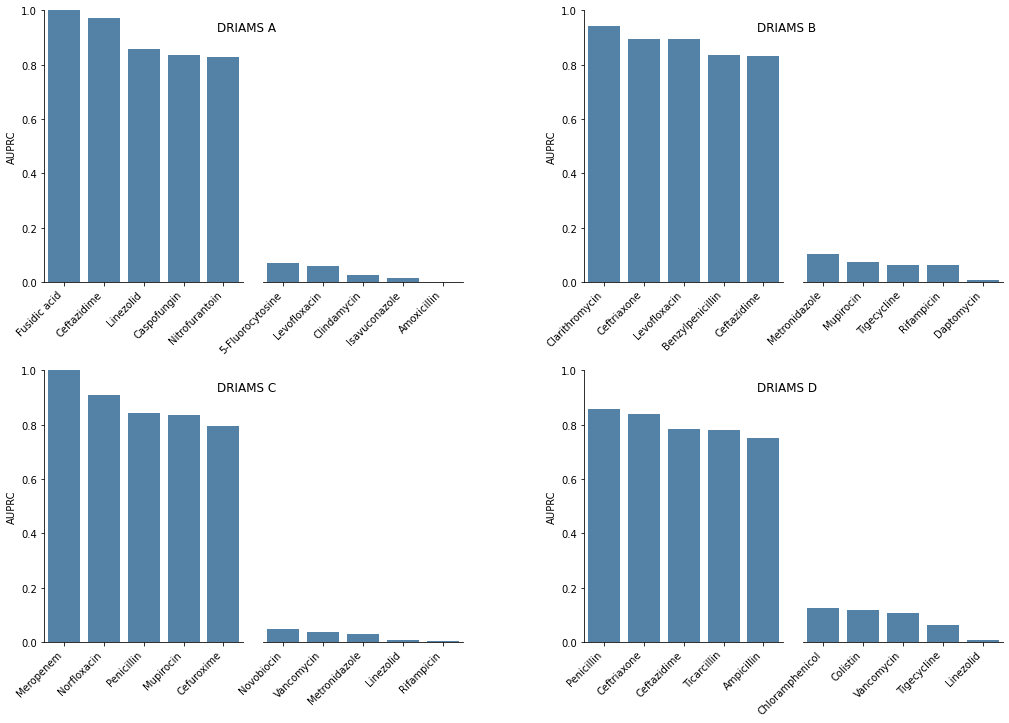

In [8]:
sel_metric = "test_AUPRC"

fig = plt.figure(figsize=(15, 10))


subfigs = fig.subfigures(nrows=2, ncols=2)
datasets = ["A", "B", "C", "D"]
for row, subfig in enumerate(subfigs.flatten()):
    dset = datasets[row]
    subfig.suptitle(f'DRIAMS {dset}', y=0.85)
    
    
    df = joined_df[joined_df["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    axs = subfig.subplots(nrows=1, ncols=2)
    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df.iloc[:5], y=sel_metric, x="drug", ax=axs[0], color="steelblue")
    sns.barplot(data=df.iloc[-5:], y=sel_metric, x="drug", ax=axs[1], color="steelblue")
    axs[0].set_ylabel("AUPRC")
    axs[0].set_xlabel("")
    axs[1].set_xlabel("")
    axs[0].set_ylim(0,1)
    axs[1].set_ylim(0,1)
    # sns.despine()
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    
    
    for label in axs[0].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    for label in axs[1].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    plt.subplots_adjust(hspace=0.9, wspace=0.1)

        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

if not os.path.exists("outputs/plots"):
    os.makedirs("outputs/plots", exist_ok=True)

fig.savefig("outputs/plots/drugs_zero_shot.pdf", bbox_inches="tight")
plt.show()


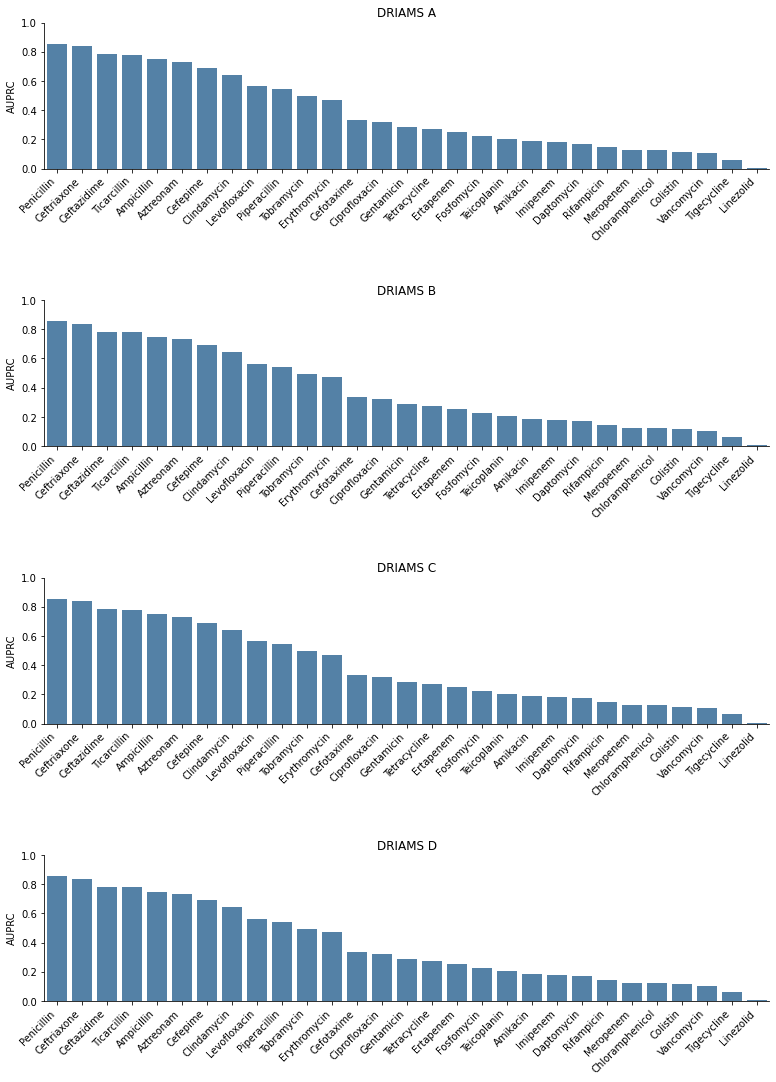

In [9]:
sel_metric = "test_AUPRC"


fig, axs = plt.subplots(4, 1, figsize=(13, 18))
for j, dataset in enumerate(["A", "B", "C", "D"]):

    df = joined_df[joined_df["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=axs[j], color="steelblue")
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[j].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
plt.show()

# Recalculate AUPRC using test sets

In [27]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [59]:
df1 = long_table[long_table["dataset"]=="A"]
df1[df1["drug"]=="Amphotericin B"]



,species,sample_id,drug,response,dataset
560,Candida glabrata,f6c79fcc-27d9-44d4-8197-ecb1b189cd85,Amphotericin B,0,A
1677,Candida albicans,57bfee3d-dab4-4469-bb81-1e26a11cbffd,Amphotericin B,0,A
3974,Candida albicans,a57e4f9c-db3c-4b24-bd3d-2b7fe1b0c10a,Amphotericin B,0,A
4941,Candida glabrata,9cc82341-8ff2-474f-bae5-deabd27c682c,Amphotericin B,0,A
4950,Candida glabrata,eac33ba3-3655-48e5-8920-c1fef201df21,Amphotericin B,0,A
...,...,...,...,...,...
471817,Candida albicans,99d22e8f-b304-483d-819e-c9359fb59df5,Amphotericin B,0,A
471826,Candida albicans,d2759502-bb0c-4057-b539-db7d9ec49a97,Amphotericin B,0,A
472990,MIX!Candida albicans,ec668d14-6dfc-4b39-a610-a18082b1fac5,Amphotericin B,0,A
472999,Candida albicans,999a02b7-ef7b-457b-bbb0-fe9a404cc43f,Amphotericin B,0,A


In [61]:
drugs_list = sorted(df1["drug"].unique())
drugs_list

['5-Fluorocytosine',
 'Amikacin',
 'Amoxicillin',
 'Amphotericin B',
 'Anidulafungin',
 'Azithromycin',
 'Aztreonam',
 'Caspofungin',
 'Cefazolin',
 'Cefepime',
 'Cefixime',
 'Cefpodoxime',
 'Ceftazidime',
 'Ceftobiprole',
 'Ceftriaxone',
 'Cefuroxime',
 'Chloramphenicol',
 'Ciprofloxacin',
 'Clarithromycin',
 'Clindamycin',
 'Colistin',
 'Cotrimoxazole',
 'Daptomycin',
 'Doxycycline',
 'Ertapenem',
 'Erythromycin',
 'Fluconazole',
 'Fosfomycin',
 'Fusidic acid',
 'Gentamicin',
 'Imipenem',
 'Isavuconazole',
 'Itraconazole',
 'Levofloxacin',
 'Linezolid',
 'Meropenem',
 'Metronidazole',
 'Micafungin',
 'Minocycline',
 'Moxifloxacin',
 'Mupirocin',
 'Nitrofurantoin',
 'Norfloxacin',
 'Oxacillin',
 'Penicillin',
 'Posaconazole',
 'Quinolones',
 'Rifampicin',
 'Teicoplanin',
 'Tetracycline',
 'Tigecycline',
 'Tobramycin',
 'Vancomycin',
 'Voriconazole']

In [52]:
drugs_df = pd.read_csv("../processed_data/drug_fingerprints.csv", index_col=0)
drugs_df

,MACCS_fp,morgan_512_fp,morgan_1024_fp,pubchem_fp
drug,,,,
5-Fluorocytosine,0000000000000000000000000000000000000110001100...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,1101110001100000000110001100100001000000000000...
Amikacin,0000000000000000000000000000000000000000000000...,0100000000000100000001000000001001010000000000...,0100000000000100000000000000001000010000000000...,1101110001111100000111101110111100000000000000...
Amoxicillin,0000000010010000000100000000000000001000000000...,0100010000000000001000000000000001001000000000...,0100010000000000001000000000000001001000000000...,1101110001111000000111101100111000000000000100...
Amphotericin B,0000000000000000000000000000000000000000000000...,0100000000000000000001000010000001011011100000...,0100000000000000000000000010000001011000100000...,1101110001111100000111111000111110000000000000...
Ampicillin,0000000010010000000100000000000000001000000000...,0100010000000000001000000000000001001000000001...,0100010000000000001000000000000001001000000000...,1101110001111000000111101100111000000000000100...
...,...,...,...,...
Ticarcillin,0000000010010000000100000000000000001000000000...,0100010000000010001000000000000001001000100000...,0100010000000010001000000000000001001000000000...,1101110001111000000111001100111000000000000110...
Tigecycline,0000000000000000000000000010000000000000000000...,0000000100000100000000000000010001001100011001...,0000000000000000000000000000000001001100010000...,1101110001111100000111101110111100000000000000...
Tobramycin,0000000000000000000000000000000000000000000000...,0000000000010000000001000000000000010000000000...,0000000000010000000000000000000000010000000000...,1101110001111100000111101110111100000000000000...


In [53]:
drug_sets = {}
long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")

long_table = long_table[long_table["drug"].isin(drugs_df.index)]

for dset in datasets:
    drug_sets[dset] = sorted(long_table[long_table["dataset"]==dset]["drug"].unique())
    print(len(drug_sets[dset]))


54
33
44
32


In [67]:
folder_template = "outputs/ResAMR_DrugZeroShot/ZS_noCNN_emb512_DRIAMS-{}_drugs_zero_shot_sp0"
drug_zs_results = []
missing_experiments = []

uniform_response = []

processed_drugs = {d: [] for d in datasets}
for dset in datasets:
    for nn in range(60):
        try:
            test_set = pd.read_csv(os.path.join(folder_template.format(dset), str(nn), "test_set.csv"))
        except:
            missing_experiments.append((dset, nn))
            continue
        drug_name = test_set["drug"].iloc[0]
        
        test_set.to_csv("outputs/ResAMR_DrugZeroShot/ZS_noCNN_emb512_results/DRIAMS-{}_{}_test.csv".format(dset, drug_name), index=False)
        avg_response = test_set["response"].mean()
        processed_drugs[dset].append(drug_name)
        if avg_response==0.0 or avg_response==1.0:
            uniform_response.append((dset, drug_name, avg_response))
            continue
        
        
        precision, recall, thresholds = precision_recall_curve(test_set["response"], test_set["Predictions"])
        auprc = auc(recall, precision)
        
        n_test = len(test_set)
        n_resistant = test_set["response"].sum()
        drug_zs_results.append([dset, drug_name, auprc, n_test, n_resistant])
    
drug_zs_results = pd.DataFrame(drug_zs_results)
drug_zs_results.columns = ["dataset", "drug", "test_AUPRC", "n_test_samples", "n_resistant_test_samples"]
drug_zs_results

,dataset,drug,test_AUPRC,n_test_samples,n_resistant_test_samples
0,A,5-Fluorocytosine,0.048747,680,25
1,A,Amikacin,0.333421,17226,975
2,A,Amoxicillin,0.547678,629,136
3,A,Anidulafungin,0.760004,675,191
4,A,Azithromycin,0.276569,95,12
...,...,...,...,...,...
140,D,Tetracycline,0.219893,3046,299
141,D,Ticarcillin,0.779399,229,161
142,D,Tigecycline,0.049462,3068,2
143,D,Tobramycin,0.406031,325,12


In [68]:
test_set

,species,sample_id,drug,response,dataset,Predictions
0,Staphylococcus epidermidis,ae2a5892-faaa-493d-a837-5a1d80364969_3312,Vancomycin,0,D,0.093304
1,Staphylococcus epidermidis,1fe16795-6257-470e-bc6d-58e952e72f00_3312,Vancomycin,0,D,0.003041
2,Staphylococcus epidermidis,e1e3ba11-532b-40fd-90dc-edec6590f5c2_3312,Vancomycin,0,D,0.002816
3,Staphylococcus aureus,7e0c8c2c-02d3-4f29-8485-e767dacfa506_3313,Vancomycin,0,D,0.000350
4,Staphylococcus aureus,e172c42c-6b4f-4a3f-a088-6b5efcb30b6f_3312,Vancomycin,0,D,0.989557
...,...,...,...,...,...,...
3326,Staphylococcus aureus,a89c8389-763b-4eca-8be2-e7a2ee59d16b_3313,Vancomycin,0,D,0.001049
3327,Staphylococcus epidermidis,006d0547-154d-4f80-a51f-52333bc18e2f_3313,Vancomycin,0,D,0.004424
3328,Enterococcus faecium,f18f542d-81a2-4a9c-a85a-eabed82bb9c3_3313,Vancomycin,0,D,0.023200
3329,Staphylococcus epidermidis,9708ff16-8025-4308-8cee-1b9b07c0e689_3312,Vancomycin,0,D,0.338026


In [69]:
drug_zs_results.to_csv("outputs/ResAMR_DrugZeroShot/ResMLP_zero_shot_AUPRC.csv", index=False)

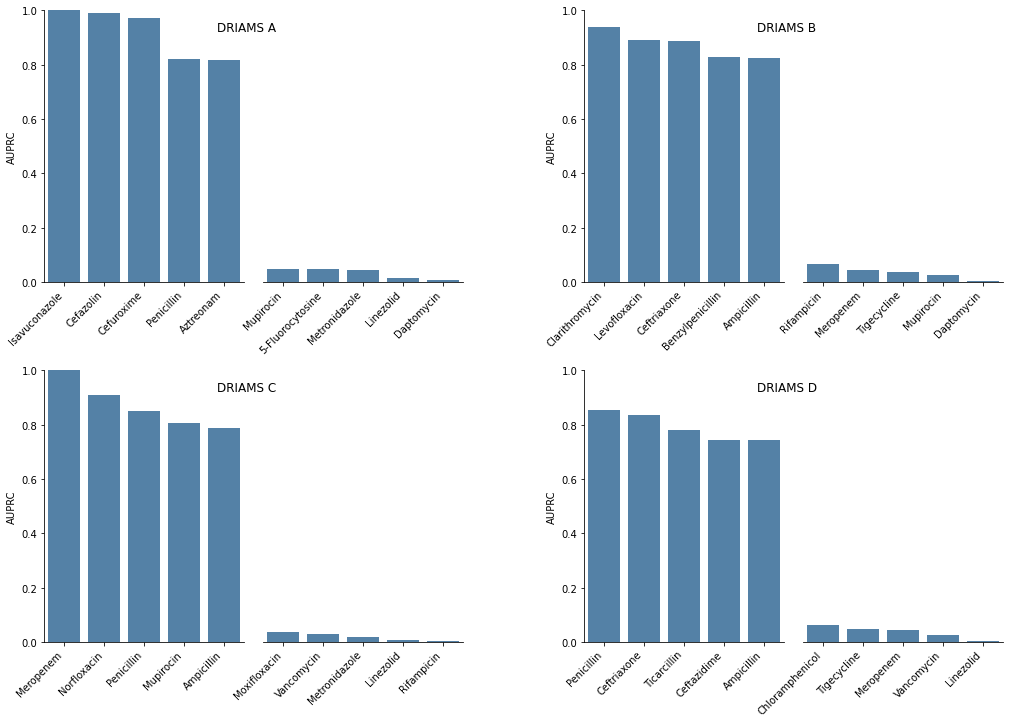

In [55]:
sel_metric = "test_AUPRC"

fig = plt.figure(figsize=(15, 10))


subfigs = fig.subfigures(nrows=2, ncols=2)
datasets = ["A", "B", "C", "D"]
for row, subfig in enumerate(subfigs.flatten()):
    dset = datasets[row]
    subfig.suptitle(f'DRIAMS {dset}', y=0.85)
    
    
    df = drug_zs_results[drug_zs_results["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    axs = subfig.subplots(nrows=1, ncols=2)
    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df.iloc[:5], y=sel_metric, x="drug", ax=axs[0], color="steelblue")
    sns.barplot(data=df.iloc[-5:], y=sel_metric, x="drug", ax=axs[1], color="steelblue")
    axs[0].set_ylabel("AUPRC")
    axs[0].set_xlabel("")
    axs[1].set_xlabel("")
    axs[0].set_ylim(0,1)
    axs[1].set_ylim(0,1)
    # sns.despine()
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    
    
    for label in axs[0].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    for label in axs[1].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    plt.subplots_adjust(hspace=0.9, wspace=0.1)

        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

if not os.path.exists("outputs/plots"):
    os.makedirs("outputs/plots", exist_ok=True)

fig.savefig("outputs/plots/drugs_zero_shot.pdf", bbox_inches="tight")
plt.show()


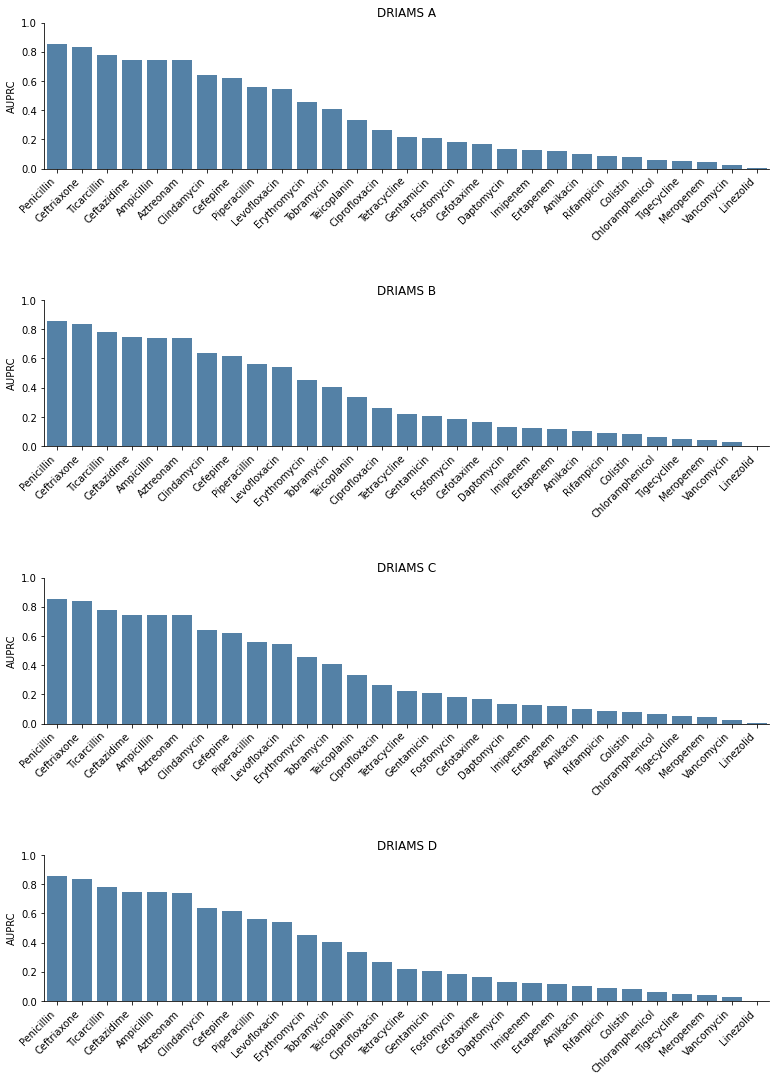

In [56]:
sel_metric = "test_AUPRC"


fig, axs = plt.subplots(4, 1, figsize=(13, 18))
for j, dataset in enumerate(["A", "B", "C", "D"]):

    df = drug_zs_results[drug_zs_results["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    # fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=axs[j], color="steelblue")
    axs[j].set_ylabel("AUPRC")
    axs[j].set_xlabel("")
    axs[j].set_title("DRIAMS {}".format(dataset))
    axs[j].set_ylim(0,1)
    sns.despine()
    
    # ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in axs[j].get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
        
        
plt.subplots_adjust(hspace=0.9, wspace=0.1)

fig.savefig("outputs/plots/drugs_zero_shot_full.pdf", bbox_inches="tight")
plt.show()

In [58]:
for dset, drug_set in drug_sets.items():
    
    df = drug_zs_results[drug_zs_results["dataset"]==dset]
    results_drugs = list(df["drug"].unique())
    print("="*30)
    print(f"DRIAMS {dset}")
    for drug_name in drug_set:
        if drug_name not in processed_drugs[dset]:
            print(drug_name)
    print("="*30)
    print("\n")


DRIAMS A


DRIAMS B


DRIAMS C


DRIAMS D




In [80]:
drugs_list = sorted(long_table["drug"].unique())

In [87]:
similarity = pd.read_csv("outputs/drugs_similarities/morgan_1024_fp_tanimoto_index.csv", index_col=0)
similarity = similarity[[c for c in similarity.columns if c in drugs_list]]
similarity = similarity.loc[[c for c in similarity.columns]]
similarity_mat = similarity.values - np.eye(len(similarity))
similarity_mat

array([[0.        , 0.04      , 0.078125  , ..., 0.03333333, 0.05072464,
        0.07      ],
       [0.04      , 0.        , 0.10752688, ..., 0.52380952, 0.20134228,
        0.1015625 ],
       [0.078125  , 0.10752688, 0.        , ..., 0.06097561, 0.18055556,
        0.15789474],
       ...,
       [0.03333333, 0.52380952, 0.06097561, ..., 0.        , 0.15602837,
        0.07758621],
       [0.05072464, 0.20134228, 0.18055556, ..., 0.15602837, 0.        ,
        0.11827957],
       [0.07      , 0.1015625 , 0.15789474, ..., 0.07758621, 0.11827957,
        0.        ]])

In [88]:
similarity

,5-Fluorocytosine,Amikacin,Amoxicillin,Amphotericin B,Ampicillin,Anidulafungin,Azithromycin,Aztreonam,Benzylpenicillin,Caspofungin,...,Quinolones,Rifampicin,Teicoplanin,Telithromycin,Tetracycline,Ticarcillin,Tigecycline,Tobramycin,Vancomycin,Voriconazole
5-Fluorocytosine,1.000000,0.040000,0.078125,0.064516,0.080645,0.058824,0.031250,0.100000,0.067797,0.084112,...,0.166667,0.047170,0.057143,0.066038,0.085714,0.059701,0.080460,0.033333,0.050725,0.070000
Amikacin,0.040000,1.000000,0.107527,0.198198,0.109890,0.163934,0.146552,0.099010,0.102273,0.181102,...,0.027027,0.106870,0.174194,0.122137,0.089109,0.105263,0.084746,0.523810,0.201342,0.101562
Amoxicillin,0.078125,0.107527,1.000000,0.137615,0.840000,0.198198,0.127273,0.186047,0.571429,0.184874,...,0.080645,0.114754,0.145695,0.121951,0.202381,0.627119,0.144231,0.060976,0.180556,0.157895
Amphotericin B,0.064516,0.198198,0.137615,1.000000,0.150943,0.156028,0.212598,0.118644,0.156863,0.117647,...,0.065934,0.169014,0.166667,0.183099,0.149123,0.135135,0.137405,0.206186,0.190476,0.094595
Ampicillin,0.080645,0.109890,0.840000,0.150943,1.000000,0.149123,0.119266,0.190476,0.653846,0.139344,...,0.120690,0.116667,0.125000,0.123967,0.207317,0.620690,0.135922,0.062500,0.158621,0.160714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticarcillin,0.059701,0.105263,0.627119,0.135135,0.620690,0.163793,0.115044,0.181818,0.551724,0.162602,...,0.078125,0.112903,0.136364,0.111111,0.157303,1.000000,0.120370,0.047059,0.154362,0.185841
Tigecycline,0.080460,0.084746,0.144231,0.137405,0.135922,0.128571,0.128788,0.114035,0.153061,0.129252,...,0.057471,0.118056,0.125000,0.131944,0.448276,0.120370,1.000000,0.066667,0.127168,0.121429
Tobramycin,0.033333,0.523810,0.060976,0.206186,0.062500,0.095652,0.125000,0.091954,0.080000,0.098361,...,0.034483,0.112069,0.152778,0.129310,0.080460,0.047059,0.066667,1.000000,0.156028,0.077586
Vancomycin,0.050725,0.201342,0.180556,0.190476,0.158621,0.167598,0.176471,0.112500,0.138889,0.166667,...,0.075188,0.139785,0.422857,0.202247,0.141935,0.154362,0.127168,0.156028,1.000000,0.118280


In [92]:
dset="A"
dataset_drugs = sorted(long_table[long_table["dataset"]==dset]["drug"].unique())
sim_df = similarity.copy()
sim_df


,5-Fluorocytosine,Amikacin,Amoxicillin,Amphotericin B,Ampicillin,Anidulafungin,Azithromycin,Aztreonam,Benzylpenicillin,Caspofungin,...,Quinolones,Rifampicin,Teicoplanin,Telithromycin,Tetracycline,Ticarcillin,Tigecycline,Tobramycin,Vancomycin,Voriconazole
5-Fluorocytosine,1.000000,0.040000,0.078125,0.064516,0.080645,0.058824,0.031250,0.100000,0.067797,0.084112,...,0.166667,0.047170,0.057143,0.066038,0.085714,0.059701,0.080460,0.033333,0.050725,0.070000
Amikacin,0.040000,1.000000,0.107527,0.198198,0.109890,0.163934,0.146552,0.099010,0.102273,0.181102,...,0.027027,0.106870,0.174194,0.122137,0.089109,0.105263,0.084746,0.523810,0.201342,0.101562
Amoxicillin,0.078125,0.107527,1.000000,0.137615,0.840000,0.198198,0.127273,0.186047,0.571429,0.184874,...,0.080645,0.114754,0.145695,0.121951,0.202381,0.627119,0.144231,0.060976,0.180556,0.157895
Amphotericin B,0.064516,0.198198,0.137615,1.000000,0.150943,0.156028,0.212598,0.118644,0.156863,0.117647,...,0.065934,0.169014,0.166667,0.183099,0.149123,0.135135,0.137405,0.206186,0.190476,0.094595
Ampicillin,0.080645,0.109890,0.840000,0.150943,1.000000,0.149123,0.119266,0.190476,0.653846,0.139344,...,0.120690,0.116667,0.125000,0.123967,0.207317,0.620690,0.135922,0.062500,0.158621,0.160714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticarcillin,0.059701,0.105263,0.627119,0.135135,0.620690,0.163793,0.115044,0.181818,0.551724,0.162602,...,0.078125,0.112903,0.136364,0.111111,0.157303,1.000000,0.120370,0.047059,0.154362,0.185841
Tigecycline,0.080460,0.084746,0.144231,0.137405,0.135922,0.128571,0.128788,0.114035,0.153061,0.129252,...,0.057471,0.118056,0.125000,0.131944,0.448276,0.120370,1.000000,0.066667,0.127168,0.121429
Tobramycin,0.033333,0.523810,0.060976,0.206186,0.062500,0.095652,0.125000,0.091954,0.080000,0.098361,...,0.034483,0.112069,0.152778,0.129310,0.080460,0.047059,0.066667,1.000000,0.156028,0.077586
Vancomycin,0.050725,0.201342,0.180556,0.190476,0.158621,0.167598,0.176471,0.112500,0.138889,0.166667,...,0.075188,0.139785,0.422857,0.202247,0.141935,0.154362,0.127168,0.156028,1.000000,0.118280


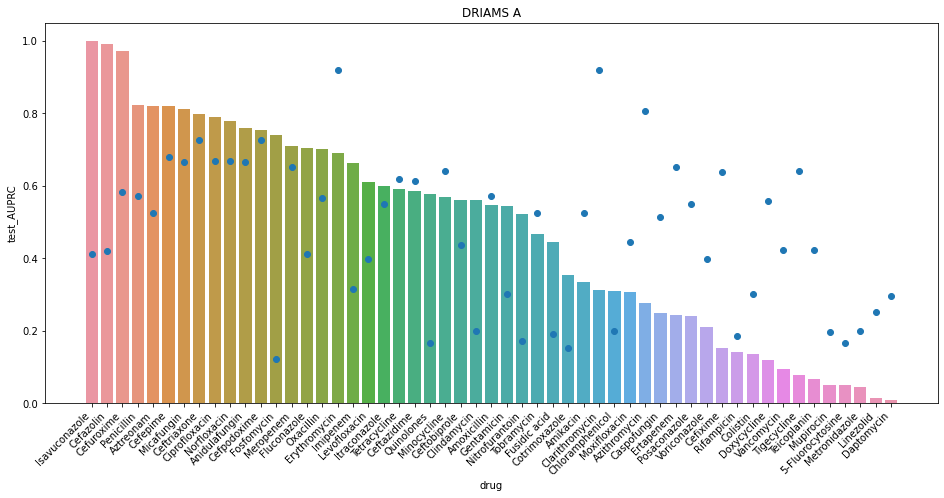

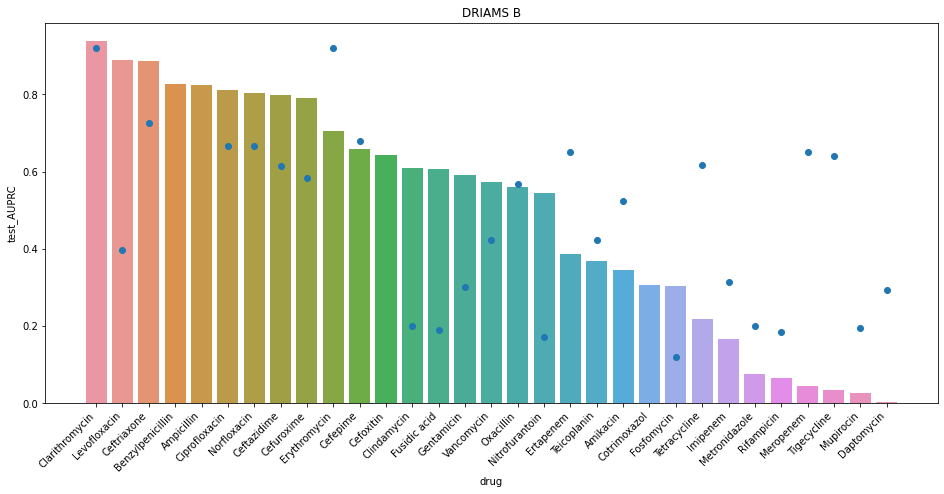

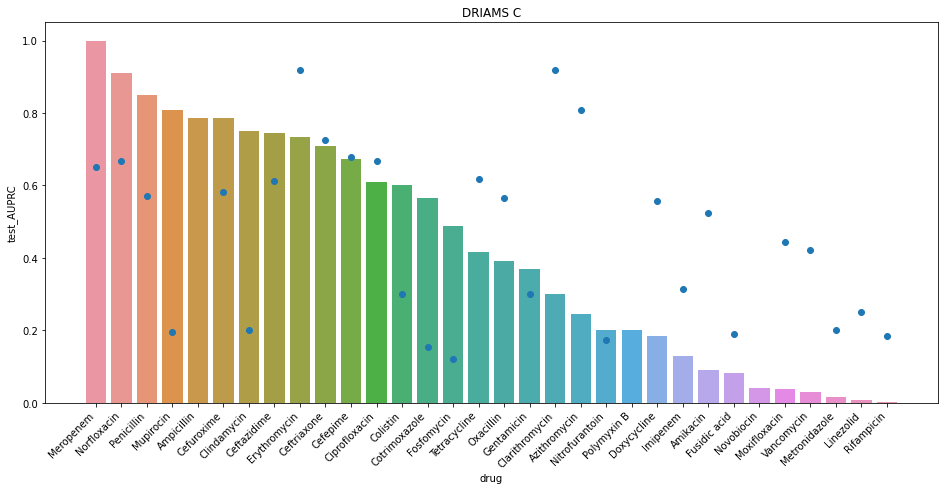

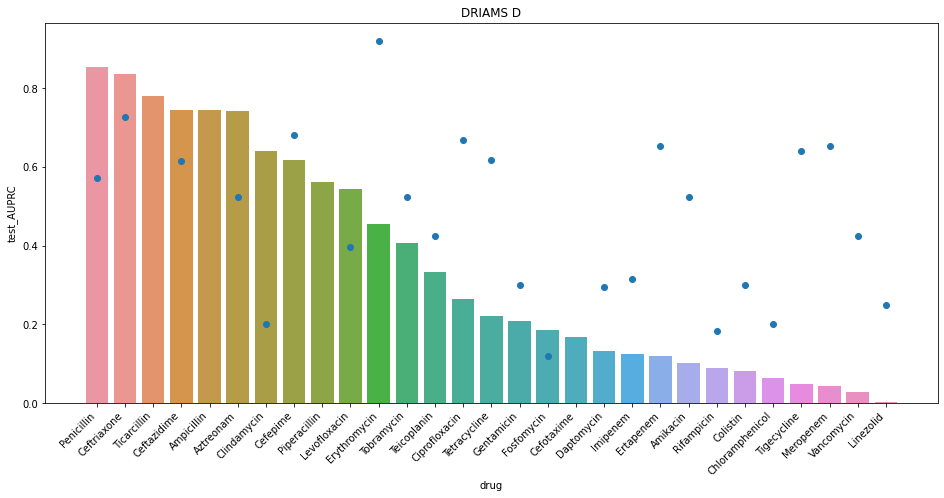

In [98]:
sel_metric = "test_AUPRC"

dset = "A"
for dset in datasets:
    sim_list = [d for d in sim_df.columns if d in dataset_drugs]
    sim_df = sim_df[sim_list]
    sim_df = sim_df.loc[sim_list]
    similarity_mat = sim_df.values - np.eye(len(sim_df))

    max_similarity = dict(zip(sim_df.columns, np.max(similarity_mat, axis=0)))



    df = drug_zs_results[drug_zs_results["dataset"]==dset].sort_values(by=sel_metric, ascending=False)

    fig, ax = plt.subplots(figsize=(16, 7))
    sns.barplot(data=df, y=sel_metric, x="drug", ax=ax)
    ax.scatter(df["drug"], df["drug"].map(max_similarity))
    for label in ax.get_xticklabels():
        label.set_ha("right")
        label.set_rotation(45)
    ax.set_title(f"DRIAMS {dset}")
    plt.show()
    plt.close(fig)

/home/gvisona/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


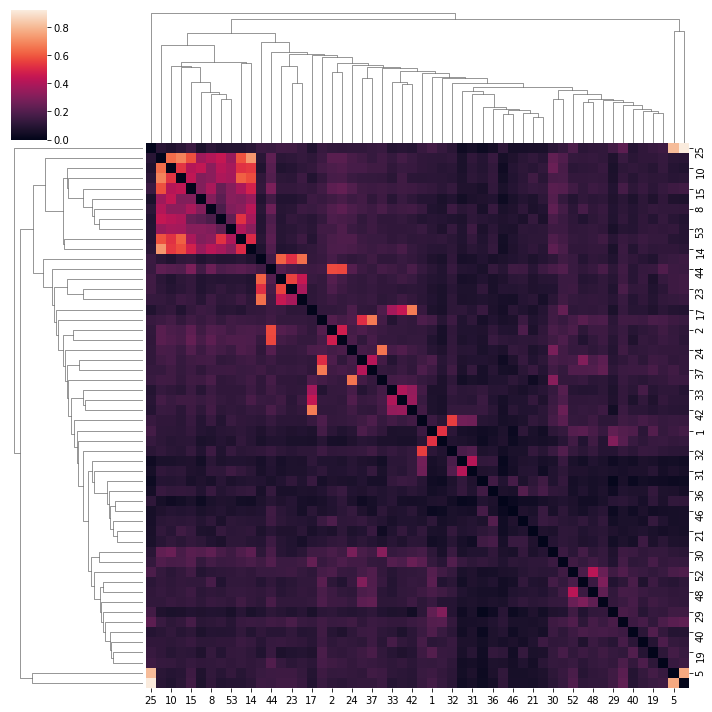

In [100]:
sns.clustermap(similarity_mat)